In [1]:
import numpy as np
from scipy.special import expit

In [2]:
import matplotlib.pyplot as plt

In [20]:
import pandas as pd

In [3]:
def irt1pl(theta, b):
    return expit(theta - b)

In [4]:
def irt2pl(theta, a, b):
    return expit(a * (theta - b))

In [5]:
def irt3pl(theta, a, b, c):
    return c + (1 - c) * expit(a * (theta - b))

In [61]:
from scipy.stats import binom
from scipy.stats import chi2

In [8]:
def sinh_du_lieu(n_students, a, b, c, loai = 2):
    theta = np.linspace(-3, 3, n_students)
    theta1 = theta
    theta = theta.reshape(-1, 1)
    f = np.repeat(21, len(theta))
    if loai == 1:
        P = irt1pl(theta, b)
    elif loai == 2:
        P = irt2pl(theta, a, b)
    else:
        P = irt3pl(theta, a, b, c)
    r = binom.rvs(f, P.flatten())
    p = r / f
    return theta, r, f, p

In [12]:
theta, r1pl, f1pl, p1pl = sinh_du_lieu(33, 1.4, 0.4, 0, 1)

In [18]:
print(f"Năng lực của từng nhóm thí sinh: {theta.flatten()}")
print(f"Số lượng thí sinh trả lời đúng tại mỗi mức năng lực theta: {r1pl}")
print(f"Số lượng thí sinh có trong từng nhóm năng lực {f1pl}")
print(f"Xác suất trả lời đúng xủa từng nhóm năng lực theta: {p1pl}")

Năng lực của từng nhóm thí sinh: [-3.     -2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5
 -1.3125 -1.125  -0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875
  0.375   0.5625  0.75    0.9375  1.125   1.3125  1.5     1.6875  1.875
  2.0625  2.25    2.4375  2.625   2.8125  3.    ]
Số lượng thí sinh trả lời đúng tại mỗi mức năng lực theta: [ 0  2  1  2  2  2  1  5  4  5  6  4  8  9  7  8  9  8 11 16 14 14 13 11
 17 18 17 16 19 16 19 21 17]
Số lượng thí sinh có trong từng nhóm năng lực [21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
Xác suất trả lời đúng xủa từng nhóm năng lực theta: [0.         0.0952381  0.04761905 0.0952381  0.0952381  0.0952381
 0.04761905 0.23809524 0.19047619 0.23809524 0.28571429 0.19047619
 0.38095238 0.42857143 0.33333333 0.38095238 0.42857143 0.38095238
 0.52380952 0.76190476 0.66666667 0.66666667 0.61904762 0.52380952
 0.80952381 0.85714286 0.80952381 0.76190476 0.9047619  0.76190476
 0.9047

In [22]:
data = {
    "theta": theta.flatten(),
    "số đúng (r1pl)": r1pl,
    "số thí sinh (f1pl)": f1pl,
    "xác suất đúng (p1pl)": p1pl
}

df = pd.DataFrame(data)

df

,theta,số đúng (r1pl),số thí sinh (f1pl),xác suất đúng (p1pl)
0,-3.0000,0,21,0.000000
1,-2.8125,2,21,0.095238
2,-2.6250,1,21,0.047619
3,-2.4375,2,21,0.095238
4,-2.2500,2,21,0.095238
5,-2.0625,2,21,0.095238
6,-1.8750,1,21,0.047619
7,-1.6875,5,21,0.238095
8,-1.5000,4,21,0.190476
9,-1.3125,5,21,0.238095


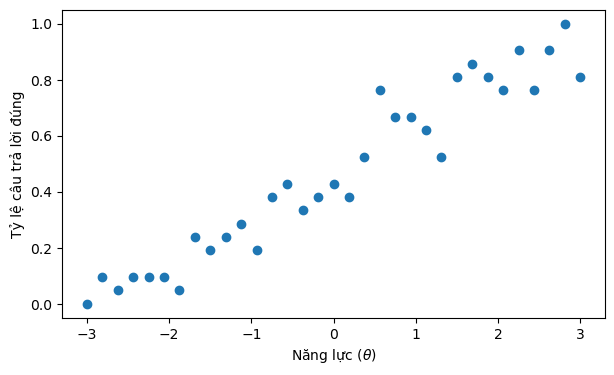

In [48]:
plt.figure(figsize=(7, 4))
plt.plot(theta, p1pl, 'o')  # Dùng 'o' để vẽ các chấm tròn
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
plt.xlabel(r"Năng lực ($\theta$)")  # Sử dụng ký hiệu theta cho trục X
plt.ylabel("Tỷ lệ câu trả lời đúng")  # Trục Y bằng tiếng Việt
# Lưu ảnh dưới dạng PNG
plt.savefig('1pl.png', format='png')
plt.show()

In [26]:
def estimate_parameters_1pl(theta, b, r, f, p, max_iterations = 100, tol = 10e-3):
    b_es = b
    for i in range(max_iterations):
        P = irt1pl(theta, b_es)
        grad = 0
        hess = 0
        for g in range(len(theta)):
            grad += -r[g] + f[g] * P[g]
            hess += f[g] * P[g] * (1 - P[g])

        delta = grad / hess
        es_new = b_es + delta

        if np.abs(delta) < tol:
            print(f"Hội tụ sau {i + 1} lần!")
            break
        b_es = es_new
    P1 = irt1pl(theta, b_es)
    cs = 0
    for g in range(len(theta)):
        v = f[g] * (p[g] - P1[g])**2 / (P1[g] - P1[g]**2)
        cs += v
    chi = chi2.ppf(0.95, df=32)
    return b_es, cs, chi

In [27]:
b_init = 0

In [28]:
b_es_1pl, cs_1pl, chi_1pl = estimate_parameters_1pl(theta, b_init, r1pl, f1pl, p1pl)

Hội tụ sau 2 lần!


In [29]:
print(f"b = {b_es_1pl}, cs = {cs_1pl}, chi = {chi_1pl}")

b = [0.23949523], cs = [35.40720796], chi = 46.19425952027847


In [30]:
P1pl = irt1pl(theta, b_es_1pl[0])

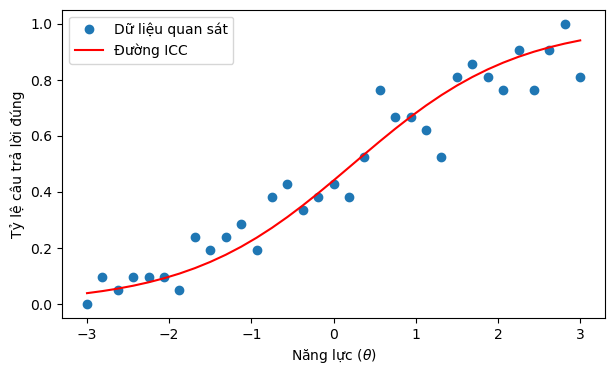

In [49]:
# Giả sử theta1 và p đã được định nghĩa trước đó, và P cũng đã được tính toán
plt.figure(figsize=(7, 4))
plt.plot(theta, p1pl, 'o', label="Dữ liệu quan sát")  # Dùng 'o' để vẽ các chấm tròn
plt.plot(theta, P1pl, label="Đường ICC", color='r')  # Vẽ đường P với màu đỏ
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
plt.xlabel(r"Năng lực ($\theta$)")  # Sử dụng ký hiệu theta cho trục X
plt.ylabel("Tỷ lệ câu trả lời đúng")  # Trục Y bằng tiếng Việt
plt.legend()  # Hiển thị chú thích (legend)
plt.savefig('tyle_2pl.png', format='png')
plt.show()

In [34]:
theta, r2pl, f2pl, p2pl = sinh_du_lieu(33, 1.4, 0.4, 0.17)

In [36]:
print(f"Năng lực của từng nhóm thí sinh: {theta.flatten()}")
print(f"Số lượng thí sinh trả lời đúng tại mỗi mức năng lực theta: {r2pl}")
print(f"Số lượng thí sinh có trong từng nhóm năng lực {f2pl}")
print(f"Xác suất trả lời đúng xủa từng nhóm năng lực theta: {p2pl}")

Năng lực của từng nhóm thí sinh: [-3.     -2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5
 -1.3125 -1.125  -0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875
  0.375   0.5625  0.75    0.9375  1.125   1.3125  1.5     1.6875  1.875
  2.0625  2.25    2.4375  2.625   2.8125  3.    ]
Số lượng thí sinh trả lời đúng tại mỗi mức năng lực theta: [ 0  0  0  1  0  0  2  0  1  3  3  1  2  3  9  8 13  9  4 10 14 15 18 15
 20 17 18 20 21 20 19 18 21]
Số lượng thí sinh có trong từng nhóm năng lực [21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
Xác suất trả lời đúng xủa từng nhóm năng lực theta: [0.         0.         0.         0.04761905 0.         0.
 0.0952381  0.         0.04761905 0.14285714 0.14285714 0.04761905
 0.0952381  0.14285714 0.42857143 0.38095238 0.61904762 0.42857143
 0.19047619 0.47619048 0.66666667 0.71428571 0.85714286 0.71428571
 0.95238095 0.80952381 0.85714286 0.95238095 1.         0.95238095
 0.9047619  0.

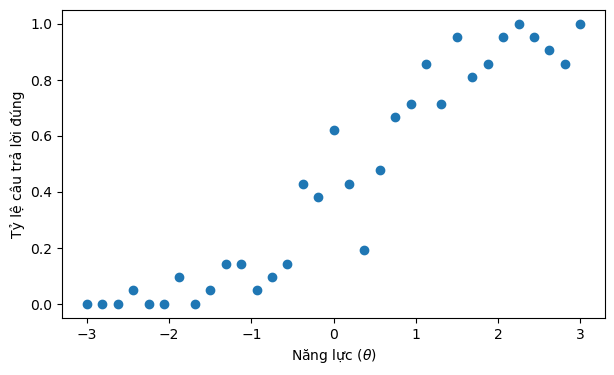

In [50]:
plt.figure(figsize=(7, 4))
plt.plot(theta, p2pl, 'o')  # Dùng 'o' để vẽ các chấm tròn
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
plt.xlabel(r"Năng lực ($\theta$)")  # Sử dụng ký hiệu theta cho trục X
plt.ylabel("Tỷ lệ câu trả lời đúng")  # Trục Y bằng tiếng Việt
# Lưu ảnh dưới dạng PNG
plt.savefig('tyle.png', format='png')
plt.show()

In [38]:
def gradient2pl(theta, a, b, r, f, p, P):
    L1 = 0
    L2 = 0
    for g in range(len(theta)):
        L1 += f[g] * (theta[g] - b) * (p[g] - P[g])
        L2 += a * f[g] * (-p[g] + P[g])
    return np.array([L1[0], L2[0]])

In [39]:
def hessian2pl(theta, a, b, r, f, p, P):
    L11 = 0
    L22 = 0
    L12 = 0
    for g in range(len(theta)):
        L11 += -f[g] * (theta[g] - b) ** 2 * P[g] * (1 - P[g])
        L22 += -a ** 2 * f[g] * P[g] * (1 - P[g])
        L12 += -r[g] + f[g] * P[g] + a * (theta[g] - b) * f[g] * P[g] * (1 - P[g])
    return np.array([[L11[0], L12[0]], [L12[0], L22[0]]])

In [40]:
def estimate_parameters_2pl(theta, a, b, r, f, p, max_iterations = 100, tol = 10e-3):
    es = np.array([a, b])
    for i in range(max_iterations):
        P = irt2pl(theta, es[0], es[1])
        grad = gradient2pl(theta, es[0], es[1], r, f, p, P)
        hess = hessian2pl(theta, es[0], es[1], r, f, p, P)
        hess_inv = np.linalg.inv(hess)  # Tính nghịch đảo trước
        delta = hess_inv @ grad         # Nhân ma trận
        es_new = es - delta
        norm_diff = np.linalg.norm(np.abs(es_new - es)) / len(es)
        norm_grad = np.linalg.norm(np.abs(grad)) / len(es)

        if norm_diff < tol or norm_grad < tol:
            print(f"Hội tụ sau {i + 1} lần!")
            break
        es = es_new
    P1 = irt2pl(theta, es[0], es[1])
    cs = 0
    for g in range(len(theta)):
        v = f[g] * (p[g] - P1[g])**2 / (P1[g] - P1[g]**2)
        cs += v
    chi = chi2.ppf(0.95, df=31)
    return es[0], es[1], cs, chi

In [41]:
a_init = 1
b_init = 0

In [42]:
a_es_2pl, b_es_2pl, cs_2pl, chi_2pl = estimate_parameters_2pl(theta, a_init, b_init, r2pl, f2pl, p2pl)

Hội tụ sau 4 lần!


In [43]:
print(f"a = {a_es_2pl}, b = {b_es_2pl}, cs = {cs_2pl}, chi = {chi_2pl}")

a = 1.3968010225970338, b = 0.38082703143684193, cs = [45.14324047], chi = 44.98534328036513


In [44]:
P2pl = irt2pl(theta, a_es_2pl, b_es_2pl)

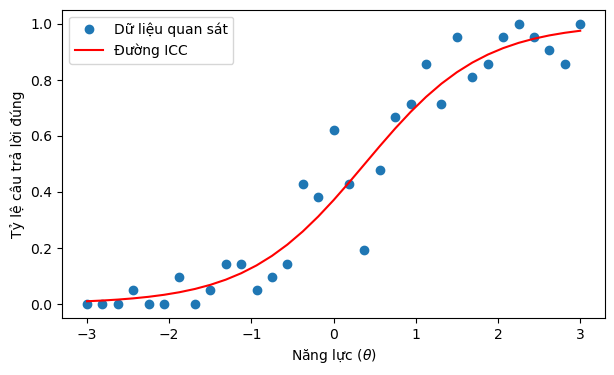

In [45]:
# Giả sử theta1 và p đã được định nghĩa trước đó, và P cũng đã được tính toán
plt.figure(figsize=(7, 4))
plt.plot(theta, p2pl, 'o', label="Dữ liệu quan sát")  # Dùng 'o' để vẽ các chấm tròn
plt.plot(theta, P2pl, label="Đường ICC", color='r')  # Vẽ đường P với màu đỏ
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
plt.xlabel(r"Năng lực ($\theta$)")  # Sử dụng ký hiệu theta cho trục X
plt.ylabel("Tỷ lệ câu trả lời đúng")  # Trục Y bằng tiếng Việt
plt.legend()  # Hiển thị chú thích (legend)
plt.savefig('tyle_2pl.png', format='png')
plt.show()

In [46]:
theta, r3pl, f3pl, p3pl = sinh_du_lieu(33, 1.4, 0.4, 0.17, 3)

In [47]:
print(f"Năng lực của từng nhóm thí sinh: {theta.flatten()}")
print(f"Số lượng thí sinh trả lời đúng tại mỗi mức năng lực theta: {r3pl}")
print(f"Số lượng thí sinh có trong từng nhóm năng lực {f3pl}")
print(f"Xác suất trả lời đúng xủa từng nhóm năng lực theta: {p3pl}")

Năng lực của từng nhóm thí sinh: [-3.     -2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5
 -1.3125 -1.125  -0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875
  0.375   0.5625  0.75    0.9375  1.125   1.3125  1.5     1.6875  1.875
  2.0625  2.25    2.4375  2.625   2.8125  3.    ]
Số lượng thí sinh trả lời đúng tại mỗi mức năng lực theta: [ 2  3  6  6  5  6  2  5  8  5  4  7 10  4 10 11  9  9 13 12 14 14 19 18
 18 20 20 21 21 20 17 21 21]
Số lượng thí sinh có trong từng nhóm năng lực [21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
Xác suất trả lời đúng xủa từng nhóm năng lực theta: [0.0952381  0.14285714 0.28571429 0.28571429 0.23809524 0.28571429
 0.0952381  0.23809524 0.38095238 0.23809524 0.19047619 0.33333333
 0.47619048 0.19047619 0.47619048 0.52380952 0.42857143 0.42857143
 0.61904762 0.57142857 0.66666667 0.66666667 0.9047619  0.85714286
 0.85714286 0.95238095 0.95238095 1.         1.         0.95238095
 0.809

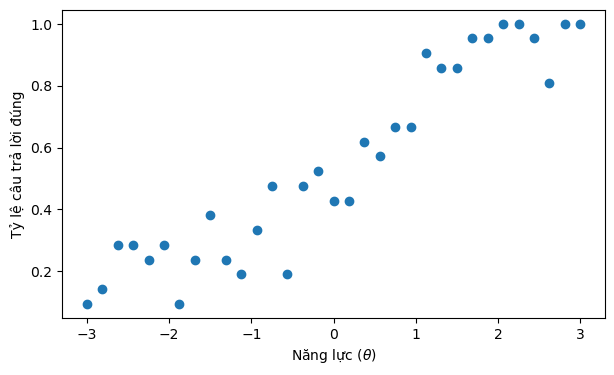

In [51]:
plt.figure(figsize=(7, 4))
plt.plot(theta, p3pl, 'o')  # Dùng 'o' để vẽ các chấm tròn
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
plt.xlabel(r"Năng lực ($\theta$)")  # Sử dụng ký hiệu theta cho trục X
plt.ylabel("Tỷ lệ câu trả lời đúng")  # Trục Y bằng tiếng Việt
# Lưu ảnh dưới dạng PNG
plt.savefig('tyle.png', format='png')
plt.show()

In [52]:
def gradient3pl(theta, a, b, c, r, f, p, P):
    L1 = 0.0
    L2 = 0.0
    L3 = 0.0
    for g in range(len(theta)):
        P_g = P[g][0]  # Chỉ dùng P[g] nếu P là 1D
        Q_g = 1 - P_g
        P_star = a * (1 - c) * P_g * Q_g
        ps = P_star / P_g

        L1 += f[g] * (p[g] - P_g) * (theta[g] - b) * ps
        L2 += -a * f[g] * (p[g] - P_g) * ps
        L3 += f[g] * (p[g] - P_g) * (1 / (P_g - c)) * ps
    return np.array([L1[0], L2, L3])

In [53]:
def hessian3pl(theta, a, b, c, r, f, p, P):
    L11 = 0.0
    L22 = 0.0
    L33 = 0.0
    L12 = 0.0
    L13 = 0.0
    L23 = 0.0

    for g in range(len(theta)):
        P_g = P[g][0]      # đảm bảo là scalar
        Q_g = 1 - P_g
        P_star = a * (1 - c) * P_g * Q_g
        ps = P_star / P_g

        L11 += -f[g] * (theta[g] - b) ** 2 * P_g * Q_g * ps ** 2
        L22 += -a ** 2 * f[g] * P_g * Q_g * ps ** 2
        L33 += -f[g] * Q_g / (1 - c) * ps

        L12 += a * f[g] * (theta[g] - b) * P_g * Q_g * ps ** 2
        L13 += -f[g] * (theta[g] - b) * Q_g / (1 - c) * ps
        L23 += a * f[g] * Q_g / (1 - c) * ps
    return np.array([
        [L11[0], L12[0], L13[0]],
        [L12[0], L22, L23],
        [L13[0], L23, L33]
    ])

In [54]:
def estimate_parameters_3pl(theta, a, b, c, r, f, p, max_iterations = 100, tol = 10e-3):
    es = np.array([a, b, c])
    for i in range(max_iterations):
        P = irt3pl(theta, es[0], es[1], es[2])
        grad = gradient3pl(theta, es[0], es[1], es[2], r, f, p, P)
        hess = hessian3pl(theta, es[0], es[1], es[2], r, f, p, P)
        try:
           hess_inv = np.linalg.inv(hess)  # Tính nghịch đảo trước
        except np.linalg.LinAlgError:
            print("Ma trận Hessian suy biến, dừng lặp")
            break
        delta = hess_inv @ grad         # Nhân ma trận
        es_new = es - delta
        norm_diff = np.linalg.norm(np.abs(es_new - es)) / len(es)
        norm_grad = np.linalg.norm(np.abs(grad)) / len(es)
        print(es_new)
        if norm_diff < tol or norm_grad < tol:
            print(f"Hội tụ sau {i + 1} lần!")
            break
        es = es_new
    P1 = irt3pl(theta, es[0], es[1], es[2])
    cs = 0
    for g in range(len(theta)):
        v = f[g] * (p[g] - P1[g])**2 / (P1[g] - P1[g]**2)
        cs += v
    chi = chi2.ppf(0.95, df=30)
    return es[0], es[1], es[2], cs, chi

In [55]:
a_init = 1
b_init = 0
c_init = 0.1

In [ ]:
a_es_3pl, b_es_3pl, c_es_3pl, cs_3pl, chi_3pl = estimate_parameters_3pl(theta, a_init, b_init, c_init, r3pl, f3pl, p3pl)

[ 1.74981599 -1.36918411  0.12898441]
[ 0.13023889 -0.02902942  0.18518049]
[ 15.0386038  -41.87369834   0.20080534]
Ma trận Hessian suy biến, dừng lặp


C:\Users\Do Duc Quang Phuong\AppData\Local\Temp\ipykernel_7828\2118620403.py:24: RuntimeWarning: divide by zero encountered in divide
  v = f[g] * (p[g] - P1[g])**2 / (P1[g] - P1[g]**2)
C:\Users\Do Duc Quang Phuong\AppData\Local\Temp\ipykernel_7828\2118620403.py:24: RuntimeWarning: invalid value encountered in divide
  v = f[g] * (p[g] - P1[g])**2 / (P1[g] - P1[g]**2)


In [56]:
import irt_parameter_estimation

In [57]:
theta = np.array(theta).flatten()
theta

array([-3.    , -2.8125, -2.625 , -2.4375, -2.25  , -2.0625, -1.875 ,
       -1.6875, -1.5   , -1.3125, -1.125 , -0.9375, -0.75  , -0.5625,
       -0.375 , -0.1875,  0.    ,  0.1875,  0.375 ,  0.5625,  0.75  ,
        0.9375,  1.125 ,  1.3125,  1.5   ,  1.6875,  1.875 ,  2.0625,
        2.25  ,  2.4375,  2.625 ,  2.8125,  3.    ])

In [62]:
a, b, c, chi2, success = irt_parameter_estimation.abc.mle_abc(3, theta, r3pl, f3pl, a_init, b_init, c_init)
print(f"3PL fit (a/b/c formulation): a={a}, b={b}, c={c}, error={chi2}, success? {success}")

21 iterations in root
3PL fit (a/b/c formulation): a=1.4887052775483185, b=0.41087808000023074, c=0.2031761422158637, error=43.84246510872811, success? True


In [64]:
from scipy.stats import chi2

In [65]:
P1 = irt3pl(theta, a, b, c)
cs = 0
for g in range(len(theta)):
    v = f3pl[g] * (p3pl[g] - P1[g])**2 / (P1[g] - P1[g]**2)
    cs += v
chichi_sq_value = chi2.ppf(0.95, df=30)

In [66]:
print(cs)
print(chichi_sq_value)

43.84246510872816
43.77297182574219


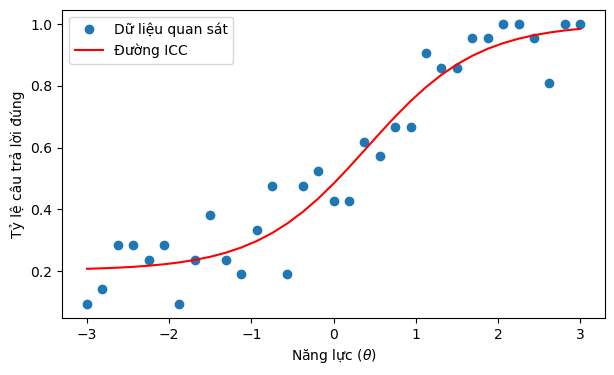

In [67]:
# Giả sử theta1 và p đã được định nghĩa trước đó, và P cũng đã được tính toán
plt.figure(figsize=(7, 4))
plt.plot(theta, p3pl, 'o', label="Dữ liệu quan sát")  # Dùng 'o' để vẽ các chấm tròn
plt.plot(theta, P1, label="Đường ICC", color='r')  # Vẽ đường P với màu đỏ
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
plt.xlabel(r"Năng lực ($\theta$)")  # Sử dụng ký hiệu theta cho trục X
plt.ylabel("Tỷ lệ câu trả lời đúng")  # Trục Y bằng tiếng Việt
plt.legend()  # Hiển thị chú thích (legend)
plt.savefig('tyle_2pl.png', format='png')
plt.show()

In [68]:
def estimate_parameters_1pl_map(theta, b, r, f, p, mean = 0, std = 1, max_iterations = 100, tol = 10e-3):
    b_es = b
    for i in range(max_iterations):
        P = irt1pl(theta, b_es)
        grad = 0
        hess = 0
        for g in range(len(theta)):
            grad += -r[g] + f[g] * P[g] - (b_es - mean) / std ** 2
            hess += f[g] * P[g] * (1 - P[g]) + 1 / std ** 2

        delta = grad / hess
        es_new = b_es + delta

        if np.abs(delta) < tol:
            print(f"Hội tụ sau {i + 1} lần!")
            break
        b_es = es_new
    P1 = irt1pl(theta, b_es)
    cs = 0
    for g in range(len(theta)):
        v = f[g] * (p[g] - P1[g])**2 / (P1[g] - P1[g]**2)
        cs += v
    chi = chi2.ppf(0.95, df=32)
    return b_es, cs, chi

In [69]:
b_es_1pl_map, cs_1pl_map, chi_1pl_map = estimate_parameters_1pl_map(theta, b_init, r1pl, f1pl, p1pl)

Hội tụ sau 2 lần!


In [70]:
print(b_es_1pl_map, cs_1pl_map, chi_1pl_map)

0.18108110929899324 36.35636540374039 46.19425952027847


In [72]:
P1pl = irt1pl(theta, b_es_1pl_map)

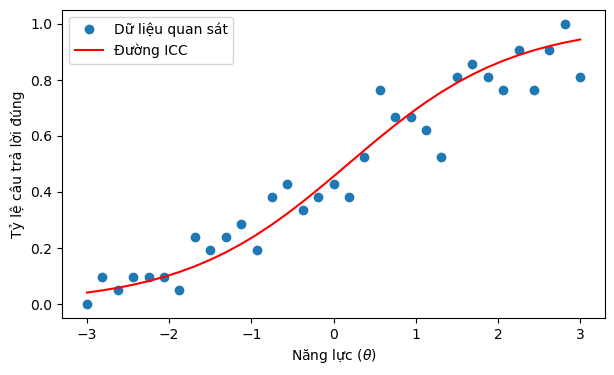

In [74]:
# Giả sử theta1 và p đã được định nghĩa trước đó, và P cũng đã được tính toán
plt.figure(figsize=(7, 4))
plt.plot(theta, p1pl, 'o', label="Dữ liệu quan sát")  # Dùng 'o' để vẽ các chấm tròn
plt.plot(theta, P1pl, label="Đường ICC", color='r')  # Vẽ đường P với màu đỏ
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
plt.xlabel(r"Năng lực ($\theta$)")  # Sử dụng ký hiệu theta cho trục X
plt.ylabel("Tỷ lệ câu trả lời đúng")  # Trục Y bằng tiếng Việt
plt.legend()  # Hiển thị chú thích (legend)
plt.savefig('tyle_2pl.png', format='png')
plt.show()

In [75]:
def gradient_map_2pl(theta, a, b, r, f, p, P, mean, std, v):
    L1 = 0
    L2 = 0
    for g in range(len(theta)):
        L1 += f[g] * (theta[g] - b) * (p[g] - P[g]) + (v - 1) / a - a
        L2 += a * f[g] * (-p[g] + P[g]) - (b - mean) / std ** 2
    return np.array([L1, L2])

In [76]:
def hessian_map_2pl(theta, a, b, r, f, p, P, mean, std, v):
    L11 = 0
    L22 = 0
    L12 = 0
    for g in range(len(theta)):
        L11 += -f[g] * (theta[g] - b) ** 2 * P[g] * (1 - P[g]) + (v - 1) / a ** 2 - 1
        L22 += -a ** 2 * f[g] * P[g] * (1 - P[g]) - 1 / std ** 2
        L12 += -r[g] + f[g] * P[g] + a * (theta[g] - b) * f[g] * P[g] * (1 - P[g])
    return np.array([[L11, L12], [L12, L22]])

In [77]:
def estimate_parameters_2pl_map(theta, a, b, r, f, p, max_iterations = 100, tol = 10e-3, mean = 0, std = 1, v = 10):
    es = np.array([a, b])
    for i in range(max_iterations):
        P = irt2pl(theta, es[0], es[1])
        grad = gradient_map_2pl(theta, es[0], es[1], r, f, p, P, mean, std, v)
        hess = hessian_map_2pl(theta, es[0], es[1], r, f, p, P, mean, std, v)
        hess_inv = np.linalg.inv(hess)  # Tính nghịch đảo trước
        delta = hess_inv @ grad         # Nhân ma trận
        es_new = es - delta
        norm_diff = np.linalg.norm(np.abs(es_new - es)) / len(es)
        norm_grad = np.linalg.norm(np.abs(grad)) / len(es)

        if norm_diff < tol or norm_grad < tol:
            print(f"Hội tụ sau {i + 1} lần!")
            break
        es = es_new
    P1 = irt2pl(theta, es[0], es[1])
    cs = 0
    for g in range(len(theta)):
        v = f[g] * (p[g] - P1[g])**2 / (P1[g] - P1[g]**2)
        cs += v
    chi = chi2.ppf(0.95, df=31)
    return es[0], es[1], cs, chi

In [79]:
a_es_2pl_map, b_es_2pl_map, cs, chi = estimate_parameters_2pl_map(theta, a_init, b_init, r2pl, f2pl, p2pl, v = 3)
print(a_es_2pl_map, b_es_2pl_map, cs, chi)

Hội tụ sau 10 lần!
1.4132168050684217 0.3132575026857251 47.16270966077577 44.98534328036513


In [80]:
P2pl = irt2pl(theta, a_es_2pl_map, b_es_2pl_map)

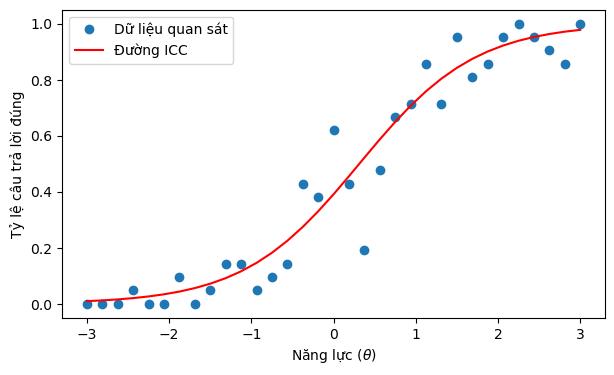

In [81]:
# Giả sử theta1 và p đã được định nghĩa trước đó, và P cũng đã được tính toán
plt.figure(figsize=(7, 4))
plt.plot(theta, p2pl, 'o', label="Dữ liệu quan sát")  # Dùng 'o' để vẽ các chấm tròn
plt.plot(theta, P2pl, label="Đường ICC", color='r')  # Vẽ đường P với màu đỏ
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
plt.xlabel(r"Năng lực ($\theta$)")  # Sử dụng ký hiệu theta cho trục X
plt.ylabel("Tỷ lệ câu trả lời đúng")  # Trục Y bằng tiếng Việt
plt.legend()  # Hiển thị chú thích (legend)
plt.savefig('tyle_2pl.png', format='png')
plt.show()

In [13]:
def gradient_map_3pl(theta, a, b, c, r, f, p, P, mean, std, v, alpha, beta):
    L1 = 0.0
    L2 = 0.0
    L3 = 0.0
    for g in range(len(theta)):
        P_g = P[g][0]  # Chỉ dùng P[g] nếu P là 1D
        Q_g = 1 - P_g
        P_star = a * (1 - c) * P_g * Q_g
        ps = P_star / P_g

        L1 += f[g] * (p[g] - P_g) * (theta[g] - b) * ps + (v - 1) / a - a
        L2 += -a * f[g] * (p[g] - P_g) * ps - (b - mean) / std ** 2
        L3 += f[g] * (p[g] - P_g) * (1 / (P_g - c)) * ps + (alpha - 1) / c + (beta - 1) / (1 - c)
    return np.array([L1[0], L2, L3])

In [14]:
def hessian_map_3pl(theta, a, b, c, r, f, p, P, mean, std, v, alpha, beta):
    L11 = 0.0
    L22 = 0.0
    L33 = 0.0
    L12 = 0.0
    L13 = 0.0
    L23 = 0.0

    for g in range(len(theta)):
        P_g = P[g][0]      # đảm bảo là scalar
        Q_g = 1 - P_g
        P_star = a * (1 - c) * P_g * Q_g
        ps = P_star / P_g

        L11 += -f[g] * (theta[g] - b) ** 2 * P_g * Q_g * ps ** 2 - (v - 1) / a ** 2 - 1
        L22 += -a ** 2 * f[g] * P_g * Q_g * ps ** 2 - 1 / std ** 2
        L33 += -f[g] * Q_g / (1 - c) * ps - (alpha - 1) / c ** 2 - (beta - 1) / (1 - c) ** 2

        L12 += a * f[g] * (theta[g] - b) * P_g * Q_g * ps ** 2
        L13 += -f[g] * (theta[g] - b) * Q_g / (1 - c) * ps
        L23 += a * f[g] * Q_g / (1 - c) * ps
    return np.array([
        [L11[0], L12[0], L13[0]],
        [L12[0], L22, L23],
        [L13[0], L23, L33]
    ])

In [15]:
def estimate_parameters_map_3pl(theta, a, b, c, r, f, p, max_iterations = 100, tol = 10e-3, mean = 0, std = 1, v = 10, alpha = 2, beta = 11):
    es = np.array([a, b, c])
    for i in range(max_iterations):
        P = irt3pl(theta, es[0], es[1], es[2])
        grad = gradient_map_3pl(theta, es[0], es[1], es[2], r, f, p, P, mean, std, v, alpha, beta)
        hess = hessian_map_3pl(theta, es[0], es[1], es[2], r, f, p, P, mean, std, v, alpha, beta)
        try:
           hess_inv = np.linalg.inv(hess)  # Tính nghịch đảo trước
        except np.linalg.LinAlgError:
            print("Ma trận Hessian suy biến, dừng lặp")
            break
        delta = hess_inv @ grad         # Nhân ma trận
        es_new = es - delta
        norm_diff = np.linalg.norm(np.abs(es_new - es)) / len(es)
        norm_grad = np.linalg.norm(np.abs(grad)) / len(es)
        print(es_new)
        if norm_diff < tol or norm_grad < tol:
            print(f"Hội tụ sau {i + 1} lần!")
            break
        es = es_new
    P1 = irt3pl(theta, es[0], es[1], es[2])
    cs = 0
    for g in range(len(theta)):
        v = f[g] * (p[g] - P1[g])**2 / (P1[g] - P1[g]**2)
        cs += v
    chi = chi2.ppf(0.95, df=30)
    return es[0], es[1], es[2], cs, chi

In [18]:
a_es_3pl, b_es_3pl, c_es_3pl, cs_3pl, chi_3pl = estimate_parameters_map_3pl(theta, a_init, b_init, c_init, r3pl, f3pl, p3pl)

[ 1.82733321 -0.0781846   0.34432375]
[ -2.15598908 -24.68494559 -11.21113093]
[ inf -inf  inf]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan

<ipython-input-13-990b568a6352>:13: RuntimeWarning: divide by zero encountered in scalar divide
  L3 += f[g] * (p[g] - P_g) * (1 / (P_g - c)) * ps + (alpha - 1) / c + (beta - 1) / (1 - c)
<ipython-input-4-034421b3f0d3>:2: RuntimeWarning: invalid value encountered in add
  return c + (1 - c) * expit(a * (theta - b))


[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
